In [149]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import datetime

read_path = r'C:\Users\XeniaRieger\OneDrive - bwedu\Dokumente\Studium Master\1. Semester\Data Literacy\Data-Literacy\Data\joined_survey_article_standardized_median.csv'
df = pd.read_csv(read_path, delimiter=';', header=0)
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")
df["SPD"] = pd.to_numeric(df["SPD"], errors='coerce')
df["Union"] = pd.to_numeric(df["Union"], errors='coerce')
df["Grüne"] = pd.to_numeric(df["Grüne"], errors='coerce')
df["FDP"] = pd.to_numeric(df["FDP"], errors='coerce')
df["AfD"] = pd.to_numeric(df["AfD"], errors='coerce')
df["Linke"] = pd.to_numeric(df["Linke"], errors='coerce')

We want to show which are media present wars by high article number. These will later on define the tameframes we are looking at in the analysis.

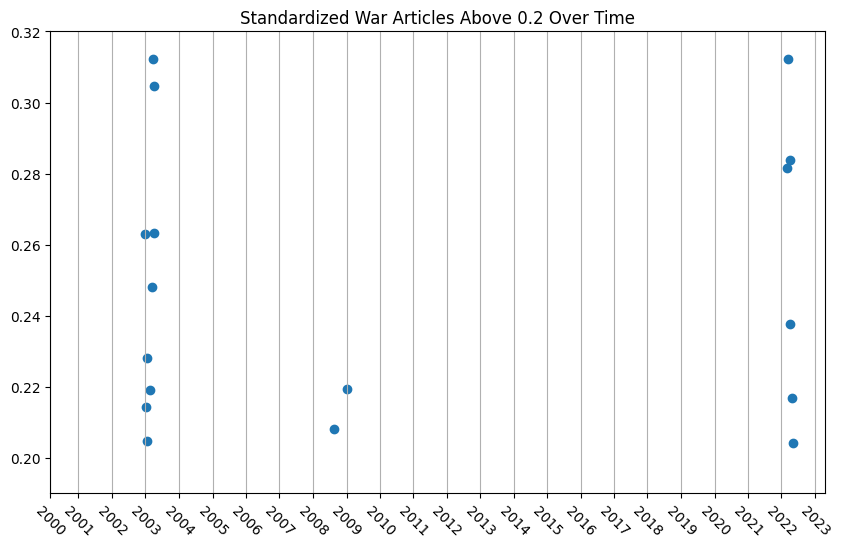

In [158]:
# Filtering the data to get values greater than 0.2 in 'standardized_war_articles'
article_value = 0.2
filtered_data = df.copy()
filtered_data['standardized_war_articles'] = filtered_data.mask(df['standardized_war_articles'] < article_value)['standardized_war_articles']
# plot
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_ylim(0.19, 0.32)
ax1.scatter(filtered_data['date'], filtered_data['standardized_war_articles'])  
plt.title('Standardized War Articles Above 0.2 Over Time')
# plot lines for each year
plt.grid(axis = 'x')
# add all years on x-axis
years = list(set(df['date'].dt.year))
# get first data point of year
x_ticks = []
index = 0
for date in filtered_data['date'].iloc[::-1]:
    if date.year == years[index]:
        x_ticks.append(date)
        index+= 1
        if index >= len(years):
            break
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(years)
plt.xticks(rotation = -45)
plt.show()

We see three timeframes with very high article numbers. Lets look at them more closely:

In [336]:
# half year before first high value and half year after last high value
def plot_war_time(start_year, end_year, title):
    this_df = df[(df['date'].dt.year >= start_year) & (df['date'].dt.year <= end_year)]
    high_values = this_df[this_df['standardized_war_articles'] >= article_value]
    first = high_values['date'].iloc[-1]
    last = high_values['date'].iloc[0]
    new_first = first - datetime.timedelta(days=6*30)
    new_last = last + datetime.timedelta(days=6*30)
    war_df = df[(df['date'] >= new_first) & (df['date'] <= new_last)]
    # plot
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.set_xlim(war_df.iloc[-1]['date'] - datetime.timedelta(days=2), war_df.iloc[0]['date'] + datetime.timedelta(days=2))
    # add all months to x axis
    x_ticks = []
    x_labels = []
    prev_month = 0
    for date in war_df['date'].iloc[::-1]:
        if date.month != prev_month:
            x_ticks.append(date)
            x_labels.append(str(date.strftime("%b")) + " " + str(date.year))
        prev_month = date.month
    ax1.set_xticks(x_ticks)
    ax1.set_xticklabels(x_labels)
    plt.xticks(rotation = -45)
    # shadow war article numer:
    # darker -> higher number
    date_before = war_df.iloc[-1]['date']
    for row in war_df.iloc[::-1].iterrows():
        col = 1 - round(row[1]['standardized_war_articles'], 2)
        timedelta = row[1]['date'] - date_before
        plt.axvspan(row[1]['date'] - timedelta + datetime.timedelta(days=1), row[1]['date'] + datetime.timedelta(days=1), facecolor=str(col))
        date_before = row[1]['date']
    # color before first and after last data point
    col = 1 - round(war_df.iloc[-1]['standardized_war_articles'], 2)
    plt.axvspan(war_df.iloc[-1]['date'] - datetime.timedelta(days=2), war_df.iloc[-1]['date'] + datetime.timedelta(days=1), facecolor=str(col))
    col = 1 - round(war_df.iloc[0]['standardized_war_articles'], 2)
    plt.axvspan(war_df.iloc[0]['date'], war_df.iloc[0]['date'] + datetime.timedelta(days=3), facecolor=str(col))
    # all parties
    ax1.plot(war_df['date'], war_df['Union'], marker='o', linestyle='-',
                 label='Union', color='black', alpha=1)
    ax1.plot(war_df['date'], war_df['SPD'], marker='o', linestyle='-',
                 label='SPD', color='red', alpha=1)
    ax1.plot(war_df['date'], war_df['FDP'], marker='o', linestyle='-',
                 label='FDP', color='yellow', alpha=1)
    ax1.plot(war_df['date'], war_df['AfD'], marker='o', linestyle='-',
                 label='AfD', color='blue', alpha=1)
    ax1.plot(war_df['date'], war_df['Grüne'], marker='o', linestyle='-',
                 label='Grüne', color='green', alpha=1)
    ax1.plot(war_df['date'], war_df['Linke'], marker='o', linestyle='-',
                 label='Linke', color='purple', alpha=1)
    # change y labels to %
    y_labels = []
    for label in ax1.get_yticklabels():
        y_labels.append(label.get_text() + "%")
    ax1.set_yticklabels(y_labels)
    
    plt.title(title)
    plt.show()

C:\Users\XeniaRieger\AppData\Local\Temp\ipykernel_10452\1590996744.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(y_labels)


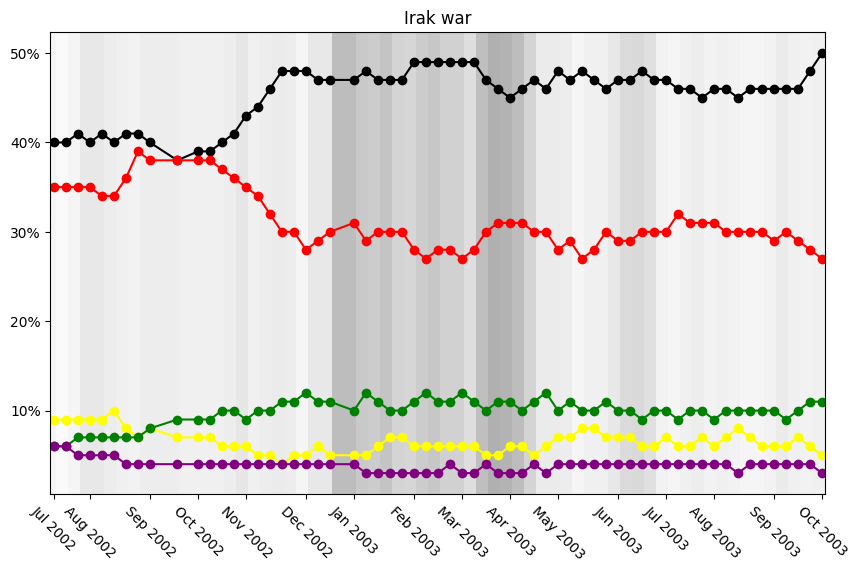

In [337]:
plot_war_time(2002, 2004, "Irak war")

C:\Users\XeniaRieger\AppData\Local\Temp\ipykernel_10452\1590996744.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(y_labels)


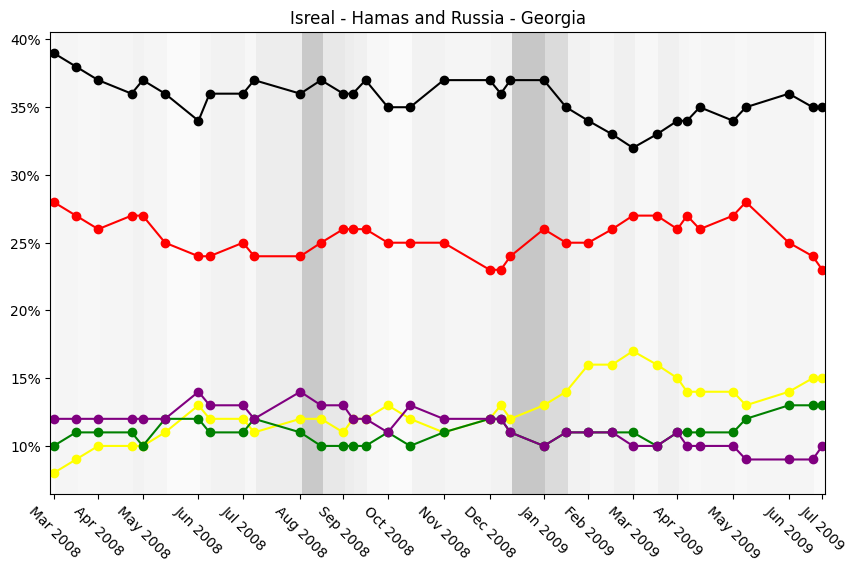

In [338]:
plot_war_time(2008, 2010, "Isreal - Hamas and Russia - Georgia")

C:\Users\XeniaRieger\AppData\Local\Temp\ipykernel_10452\1590996744.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(y_labels)


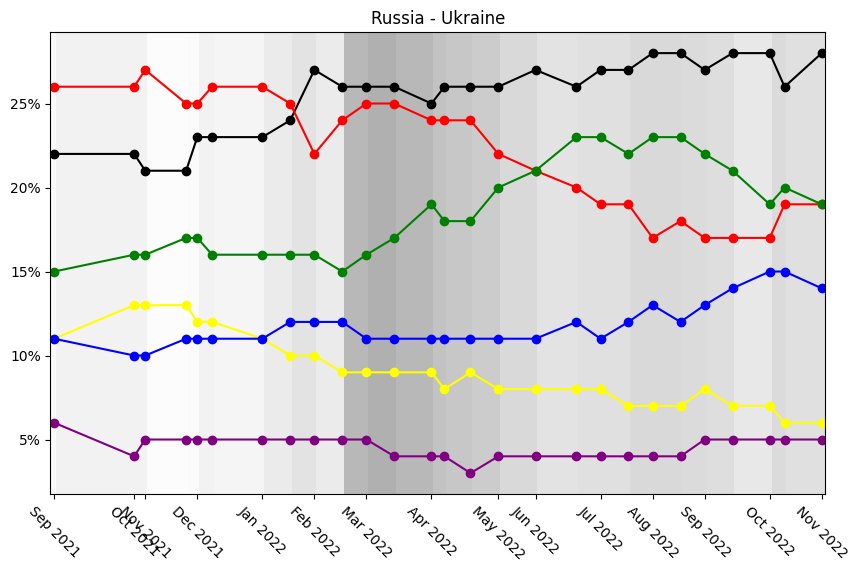

In [339]:
plot_war_time(2022, 2023, "Russia - Ukraine")